In [1]:
# 농어 데이터
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    perch_length, perch_weight
)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(X_train, y_train)
print(knr.predict([[50]])) # 길이가 50cm인 농어는?

[1066.66666667]


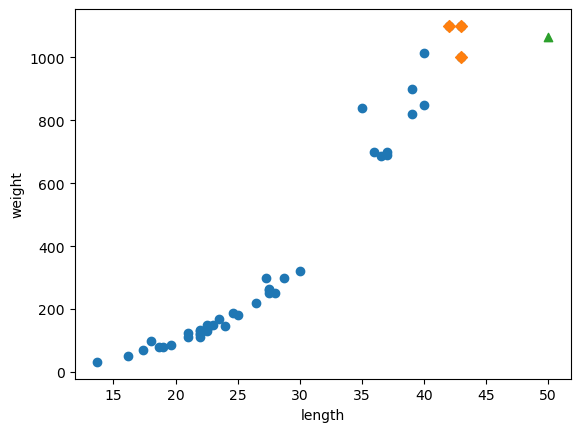

In [7]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(X_train, y_train)
plt.scatter(X_train[indexes], y_train[indexes], marker='D')
plt.scatter(50, 1066, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 잘못 추정했음을 확인할 수 있음.

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.predict([[50]])) # 값이 바뀜.

print(f'f(x) = {lr.coef_[0]:.3f}x {lr.intercept_:.3f}')

[1262.74811777]
f(x) = 39.983x -736.403


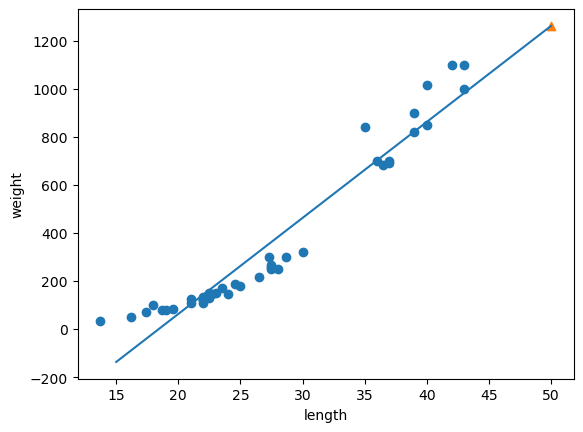

In [18]:
plt.scatter(X_train, y_train)

plt.plot([15, 50], [lr.coef_*15 + lr.intercept_, lr.coef_*50 + lr.intercept_])

plt.scatter(50, 1262.7, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 어 근데 무게가 음수가 된다?

In [25]:
train_poly = np.column_stack((X_train ** 2, X_train)) # 옆으로 철썩
test_poly = np.column_stack((X_test ** 2, X_test))

lr = LinearRegression()
lr.fit(train_poly, y_train)
print(lr.predict([[50**2, 50]]))
print(f'f(x) = {lr.coef_[0]:.3f}x^2 - {-lr.coef_[1]:.3f}x + {lr.intercept_:.3f}')

[1699.15849494]
f(x) = 1.255x^2 - 34.189x + 271.644


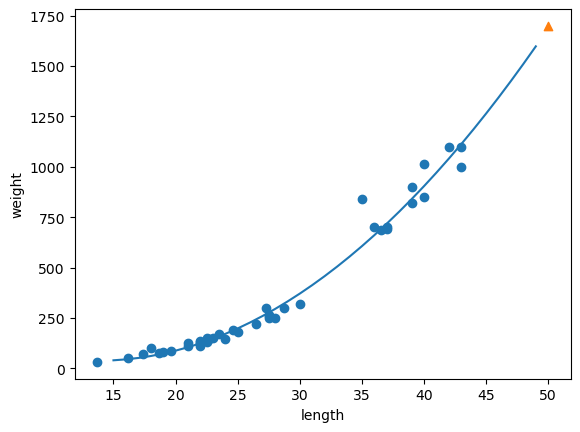

In [26]:
point = np.arange(15, 50)

plt.scatter(X_train, y_train)
plt.plot(point, 1.25*point**2 - 34.189*point + 271.644)
plt.scatter(50, 1699, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 편ㅡ안

In [27]:
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.9781009816969921
0.9342214882183817
